#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks.
###### Don't make any changes to the rest part of the codes
###### Duetime:1:30 PM

In [4]:
## import cv2
import cv2
## import numpy
import numpy as np
## import matplotlib pyplot
import matplotlib.pyplot as plt
## import KMeans cluster from sklearn
from sklearn.cluster import KMeans
## import distance from scipy.spatial
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## Face Detection on given image

In [5]:
# Reading the image
img = cv2.imread(r"C:\Users\navde\Downloads\Plaksha_Faculty.jpg")

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(r"C:\Users\navde\Downloads\haarcascade_frontalface_alt 1 (1).xml")  # Provide the correct path
# Applying the face detection method on the grayscale image.
faces_rect = face_cascade.detectMultiScale(gray_img, scaleFactor=1.04, minNeighbors=10)

# Define the text and font parameters

text =  f'Total number of faces detected are {len(faces_rect)}' ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX ## Font type
font_scale = 1 ## Font scale factor
font_color =  (0, 0, 255) ## Text color in BGR format (here, it's red)
font_thickness = 2 ## Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image
    cv2.putText(img, text, (10, 25), font, font_scale, font_color, font_thickness)

# Display the image and window title should be "Total number of face detected are #"
cv2.imshow(f'Total number of faces detected are {len(faces_rect)}', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Visualising images by their hue and saturation features

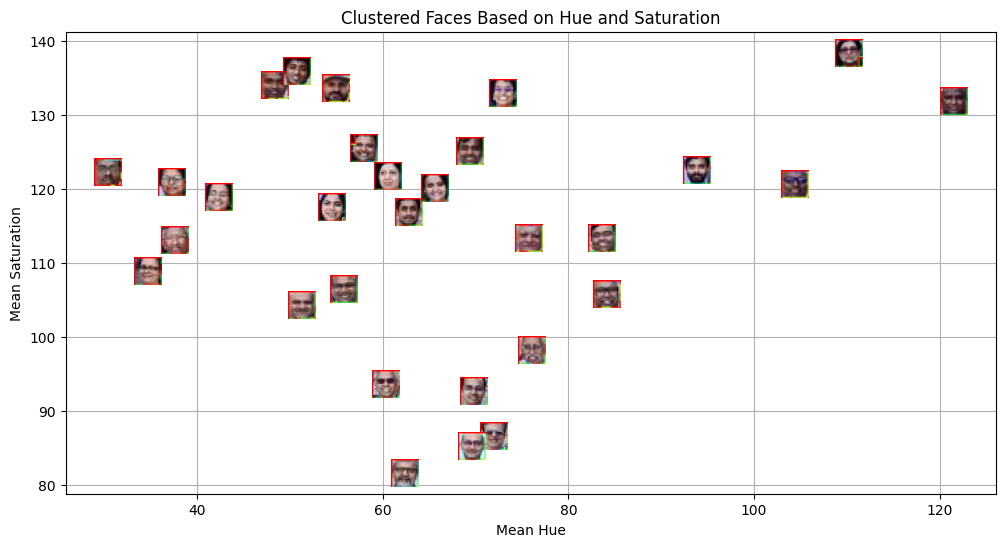

In [6]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 

hue_saturation = [] ## call the img and convert it from BGR to HSV and store in img_hsv
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])  # Extract mean hue for the face
    saturation = np.mean(face[:, :, 1])  # Extract mean saturation for the face
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o')  # Use 'o' for markers

# Put x label
plt.xlabel('Mean Hue')
# Put y label
plt.ylabel('Mean Saturation')
# Put grid
plt.grid(True)
# Put title
plt.title('Clustered Faces Based on Hue and Saturation')
# show the plot
plt.show()



## Assign class labels to each face using kmeans. Visualise the clusters formed

C:\Users\navde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


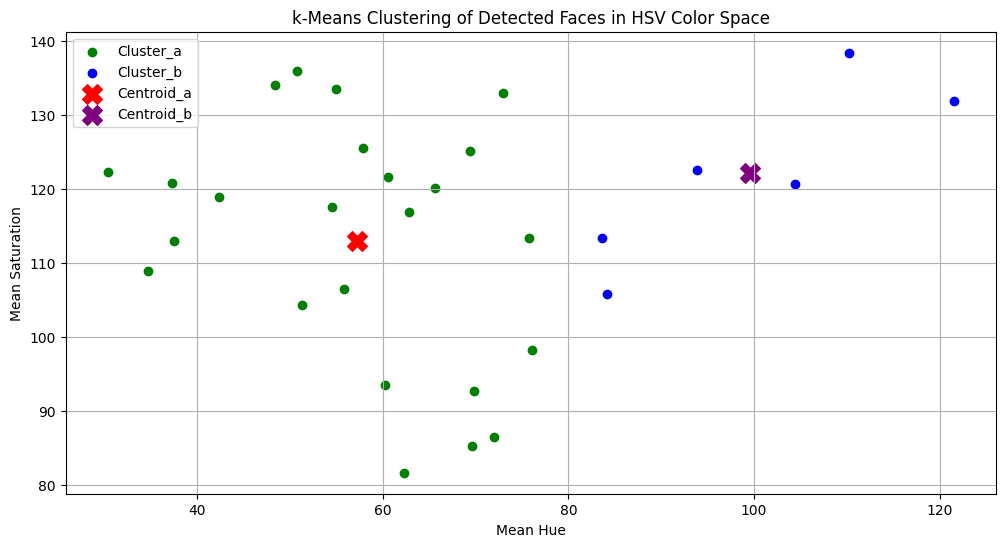

In [7]:
## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Collect points for cluster plot
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
## Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster_a', marker='o')


cluster_1_points = np.array(cluster_1_points)
## Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster_b', marker='o')

## Calculate and plot centroids
centroid_0 = centroids[0]
centroid_1 = centroids[1]

# Plot both the centroid for cluster 0 and cluster 1
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=200, label='Centroid_a')
plt.scatter(centroid_1[0], centroid_1[1], c='purple', marker='X', s=200, label='Centroid_b')

## Put x label
plt.xlabel('Mean Hue')
## Put y label
plt.ylabel('Mean Saturation')
## Put title
plt.title('k-Means Clustering of Detected Faces in HSV Color Space')
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()


## Face detection on shashi tharoor

In [8]:
# Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread(r"C:\Users\navde\Downloads\Shashi_Tharoor.jpeg")

# Convert the template image to grayscale
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

template_faces = face_cascade.detectMultiScale(template_gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display the template image with rectangles around detected faces
cv2.imshow('Template image of shashi tharoor', template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Plot template image along with other images

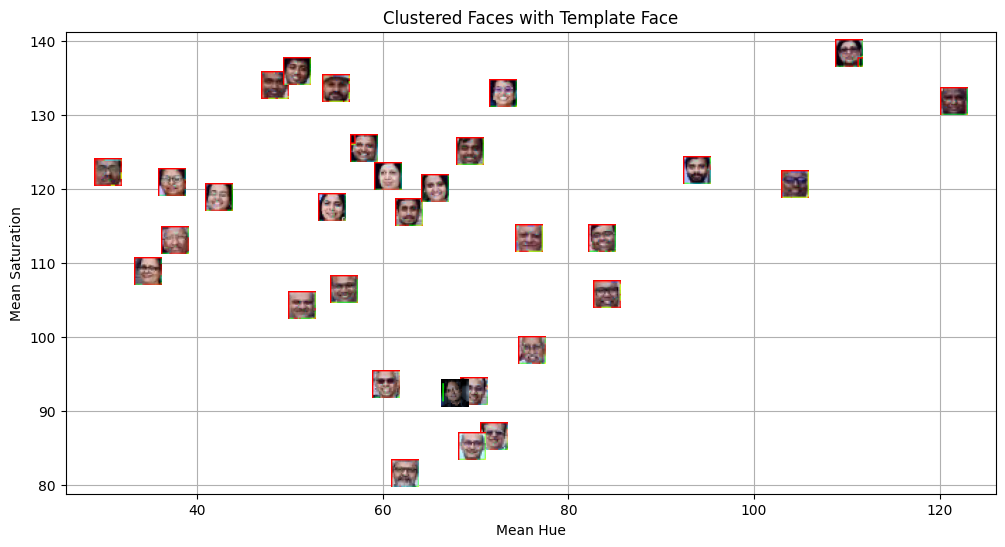

In [9]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did for detected faces
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces, along with the template face
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

# Put x label
plt.xlabel('Mean Hue')
# Put y label
plt.ylabel('Mean Saturation')
# Put title
plt.title('Clustered Faces with Template Face')
# Add grid
plt.grid(True)
# Show the plot
plt.show()


## Perform classification on new image using distance from clusters. Visualise the clusters.

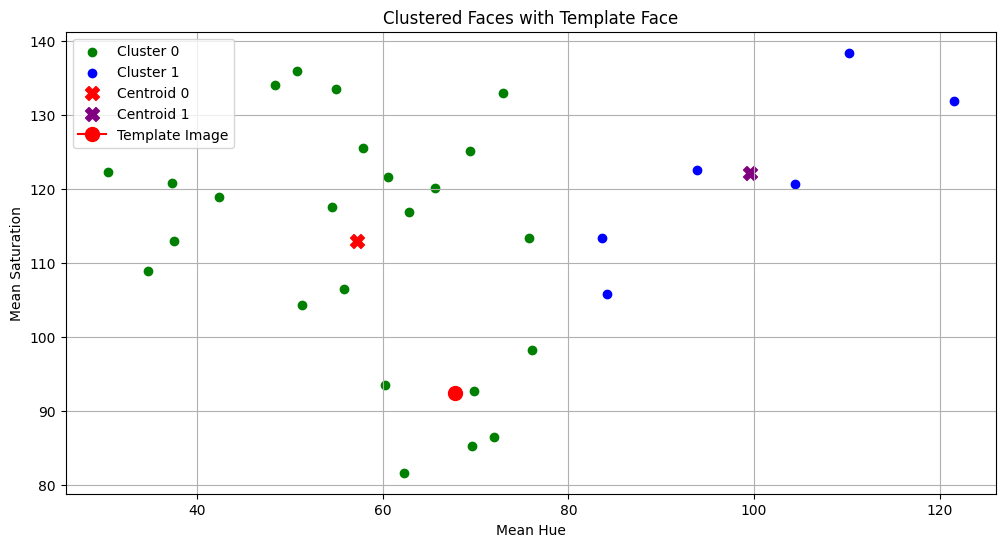

In [10]:
# Find distance for the new image from each cluster
distances = kmeans.transform(np.array([[template_hue, template_saturation]]))

# Predict the cluster label for the template image and store it in template_label
template_label = np.argmin(distances)

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Assign color to the template image based on class label
if template_label == 0:
    color = 'red'
else:
    color = 'blue'

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=100, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='purple', marker='X', s=100, label='Centroid 1')  ## plot for centroid 1

# Plot the template image's position with appropriate class color
plt.plot(template_hue, template_saturation, marker='o', c=color, markersize=10, label='Template Image')

# Put x label
plt.xlabel('Mean Hue')
# Put y label
plt.ylabel('Mean Saturation')
# Put title
plt.title('Clustered Faces with Template Face')
# Add a legend
plt.legend()
# Add grid
plt.grid(True)
# Show the plot
plt.show()
